In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import integrate

In [2]:
def free_energy_from_file(temp, chi, N):
    path = os.path.join(f"{int(100*temp)}\\{chi}", f"{N}.npz")
    data = np.load(path)

    log_factors = np.array(data["log_factors"])
    n_spins = np.array(data["n_spins"])

    return -temp * np.sum(log_factors / n_spins)

In [3]:
def plot_free_energy(temps,chis,N):
    plt.figure(figsize=(15, 5))
    l = len(temps)
    dt = temps[1]-temps[0]
    for chi in chis:
        fe = []
        err = []
        for temp in temps:
            Fr = free_energy_from_file(temp,chi,N)
            fe.append(Fr)
            F = free_energy_per_site(temp)
            err.append(abs(Fr/F-1))
        plt.subplot(121)
        plt.plot(temps,fe,label=f'chi={chi}',marker = '.')
            
        plt.subplot(122)
        plt.plot(temps,err,label=f'chi={chi}',marker = '.')
    plt.subplot(121)
    plt.title('Free Energy Per Site under 20 Iteration')
    plt.xlabel(r'Temperature $k_BT/\ J$')
    plt.ylabel('Free Energy Per Site')
    plt.axvline(x=2.27, color='r', linestyle='--',label = r'$T_c$')
    plt.legend()
    plt.subplot(122)
    plt.title('Error of Free Energy Per Site')
    plt.xlabel(r'Temperature $k_BT/\ J$')
    plt.ylabel('Relative Error')
    plt.yscale('log')
    plt.axvline(x=2.27, color='r', linestyle='--',label = r'$T_c$')
    plt.legend()

In [4]:
def kappa_from_K(K):

    return 2.0 * np.sinh(2.0 * K) / (np.cosh(2.0 * K)**2)


def _integrand(theta, kappa):
   
    s = np.sin(theta)
    inside_sqrt = 1.0 - (kappa**2) * (s**2)

    inside_sqrt = np.clip(inside_sqrt, 0.0, None)

    return np.log(0.5 * (1.0 + np.sqrt(inside_sqrt)))


def free_energy_per_site(T, J=1.0, k_B=1.0, **quad_kwargs):
   
    beta = 1.0 / (k_B * T)
    K = beta * J
    kap = kappa_from_K(K)

    # Integral over theta in [0, pi]
    I, err = integrate.quad(_integrand, 0.0, np.pi, args=(kap,), **quad_kwargs)

    # Dimensionless free energy: -beta f
    minus_beta_f = np.log(2.0 * np.cosh(2.0 * K)) + (1.0 / (2.0 * np.pi)) * I

    # Return f
    f = -minus_beta_f / beta
    return f

In [5]:
def plot_free_energy_err(temps,chis,N):
    for chi in chis:
        err = []
        for temp in temps:
            F = free_energy_per_site(temp)
            err.append(abs(free_energy_from_file(temp,chi,N)/F-1))
        plt.plot(temps,err,marker='o',label=f'chi={chi}')
    plt.title('Free Energy Error under 20 Iteration')
    plt.xlabel('Temperature')
    plt.ylabel('Relative Error')
    plt.yscale('log')
    plt.legend()

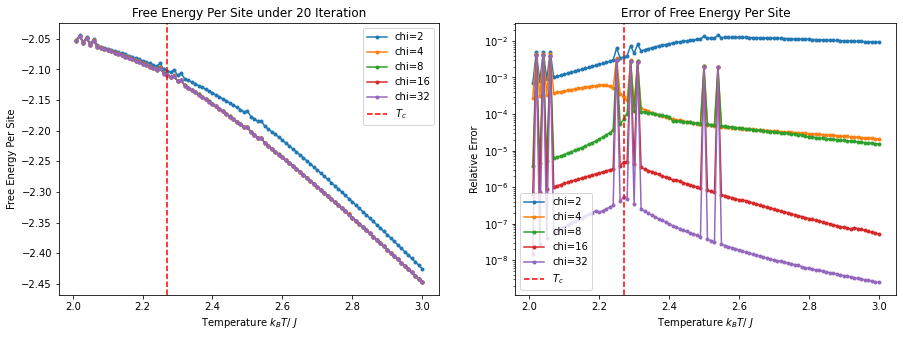

In [6]:
plot_free_energy(np.linspace(2,3,101)[1:],[2,4,8,16,32],25)

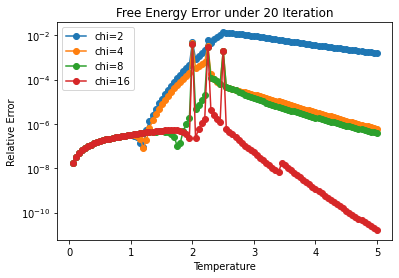

In [7]:
plot_free_energy_err(np.linspace(0,5,101)[1:],[2,4,8,16],20)

In [8]:
def plot_cv(temps,chis,N):
    l = len(temps)
    dt = temps[1]-temps[0]
    for chi in chis:
        fe = []
        for temp in temps:
            Fr = free_energy_from_file(temp,chi,N)
            fe.append(Fr)
            F = free_energy_per_site(temp)
        g = [-temps[i]*((fe[i+1]-fe[i])-(fe[i]-fe[i-1]))/(dt**2) for i in range(1,l-1)]
        plt.plot([temps[i+1] for i,j in enumerate(g) if (abs(j)<20 and j>0.5)],[G for G in g if (abs(G)<20 and G>0.5)],label=f'chi={chi}',marker = '.')
    plt.title(f'Heat Capacity Per Site under {N} Iteration')
    plt.xlabel(r'Temperature $k_BT/\ J$')
    plt.ylabel('Heat Capacity Per Site')
    plt.axvline(x=2.27, color='r', linestyle='--',label = r'$T_c$')
    plt.legend()

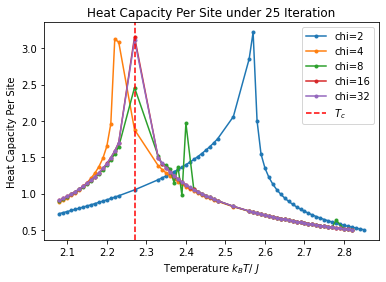

In [9]:
plot_cv(np.linspace(2,3,101)[1:],[2,4,8,16,32],25)

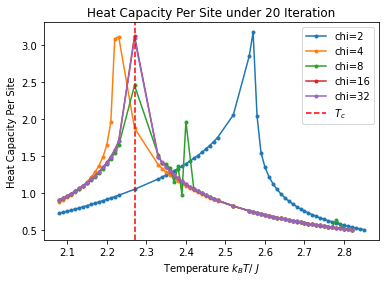

In [10]:
plot_cv(np.linspace(2,3,101)[1:],[2,4,8,16,32],20)

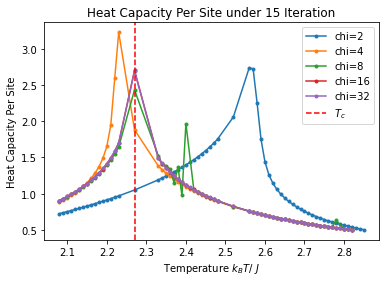

In [11]:
plot_cv(np.linspace(2,3,101)[1:],[2,4,8,16,32],15)

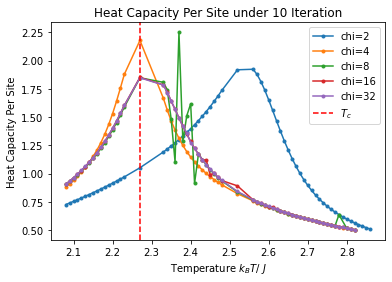

In [12]:
plot_cv(np.linspace(2,3,101)[1:],[2,4,8,16,32],10)